In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [5]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
pd.set_option('display.max_columns', None)

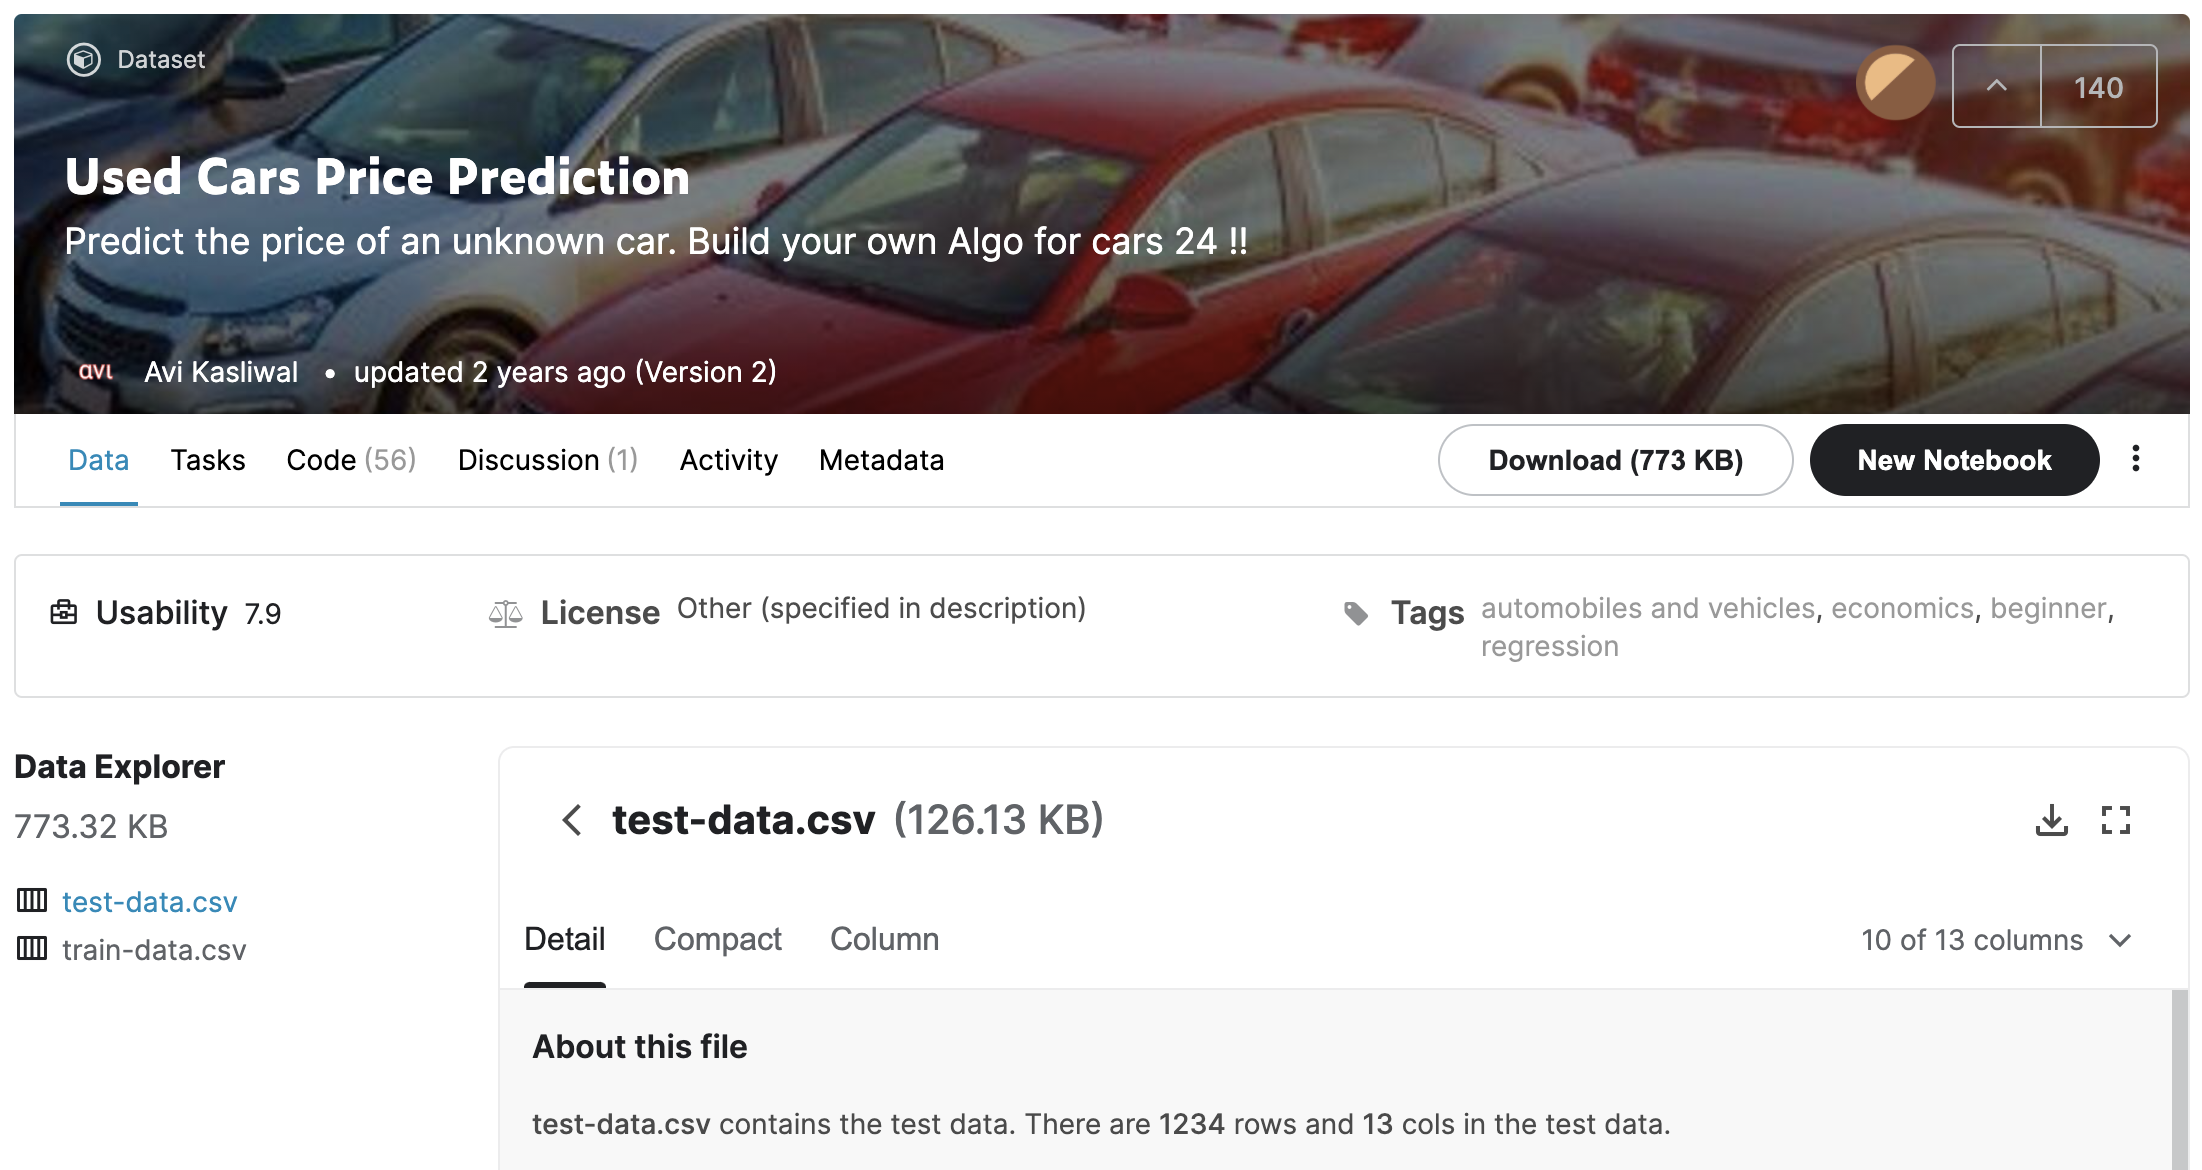

In [7]:
car_t = pd.read_csv('./train_data_r.csv')
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환

In [8]:
# Mileage null값 확인
car_t[car_t['Mileage'].isnull()]

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5,13.58 Lakh,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5,NaN,12.75


In [9]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])
car_t.reset_index(drop=True, inplace=True)

In [10]:
# 필요없는 컬럼 제거
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [12]:
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')

Brand
Car_name
Mile
Eng
Pow


In [13]:
car_t['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [14]:
# 중복되는 브랜드 제거
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

In [15]:
obj_col = ['Mile', 'Eng', 'Pow']
# 형변환
for i in obj_col:
    car_t[i] = car_t[i].astype(float)
    print(i)

Mile
Eng
Pow


In [16]:
car_t.pivot_table(index='Fuel_Type', aggfunc='count')

,Brand,Car_name,Eng,Engine,Kilometers_Driven,Location,Mile,Mileage,Name,New_Price,Owner_Type,Pow,Power,Price,Seats,Transmission,Year
Fuel_Type,,,,,,,,,,,,,,,,,
CNG,56,56,56,56,56,56,56,56,56,9,56,56,56,56,56,56,56
Diesel,3205,3205,3205,3205,3205,3205,3205,3205,3205,443,3205,3205,3205,3205,3205,3205,3205
LPG,10,10,10,10,10,10,10,10,10,0,10,10,10,10,10,10,10
Petrol,2746,2746,2746,2746,2746,2746,2746,2746,2746,371,2746,2746,2746,2746,2746,2746,2746


In [17]:
# 각 Fuel_type을 km/L로 계산
car_t['Mile'][car_t['Fuel_Type'] == 'CNG']= car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64
car_t['Mile'][car_t['Fuel_Type'] == 'LPG']= car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

In [18]:
# dummy 생성
dummy_col = ['Brand', 'Fuel_Type', 'Transmission']

for i in dummy_col:
    dummy = pd.get_dummies(car_t[i])
    car_t = pd.concat([car_t, dummy], axis=1)
    print(i)

Brand
Fuel_Type
Transmission


In [19]:
# Owner를 1234로 변환
car_t['Owner'] = range(0,len(car_t))

for i in range(0,len(car_t)):
    if car_t['Owner_Type'][i] == 'First':
        car_t['Owner'][i] = 1

    elif car_t['Owner_Type'][i] == 'Second':
        car_t['Owner'][i] = 2

    elif car_t['Owner_Type'][i] == 'Third':
        car_t['Owner'][i] = 3

    elif car_t['Owner_Type'][i] == 'Fourth & Above':
        car_t['Owner'][i] = 4

In [20]:
# dummy 생성후 중복 컬럼 제거
car_t.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis=1, inplace=True)

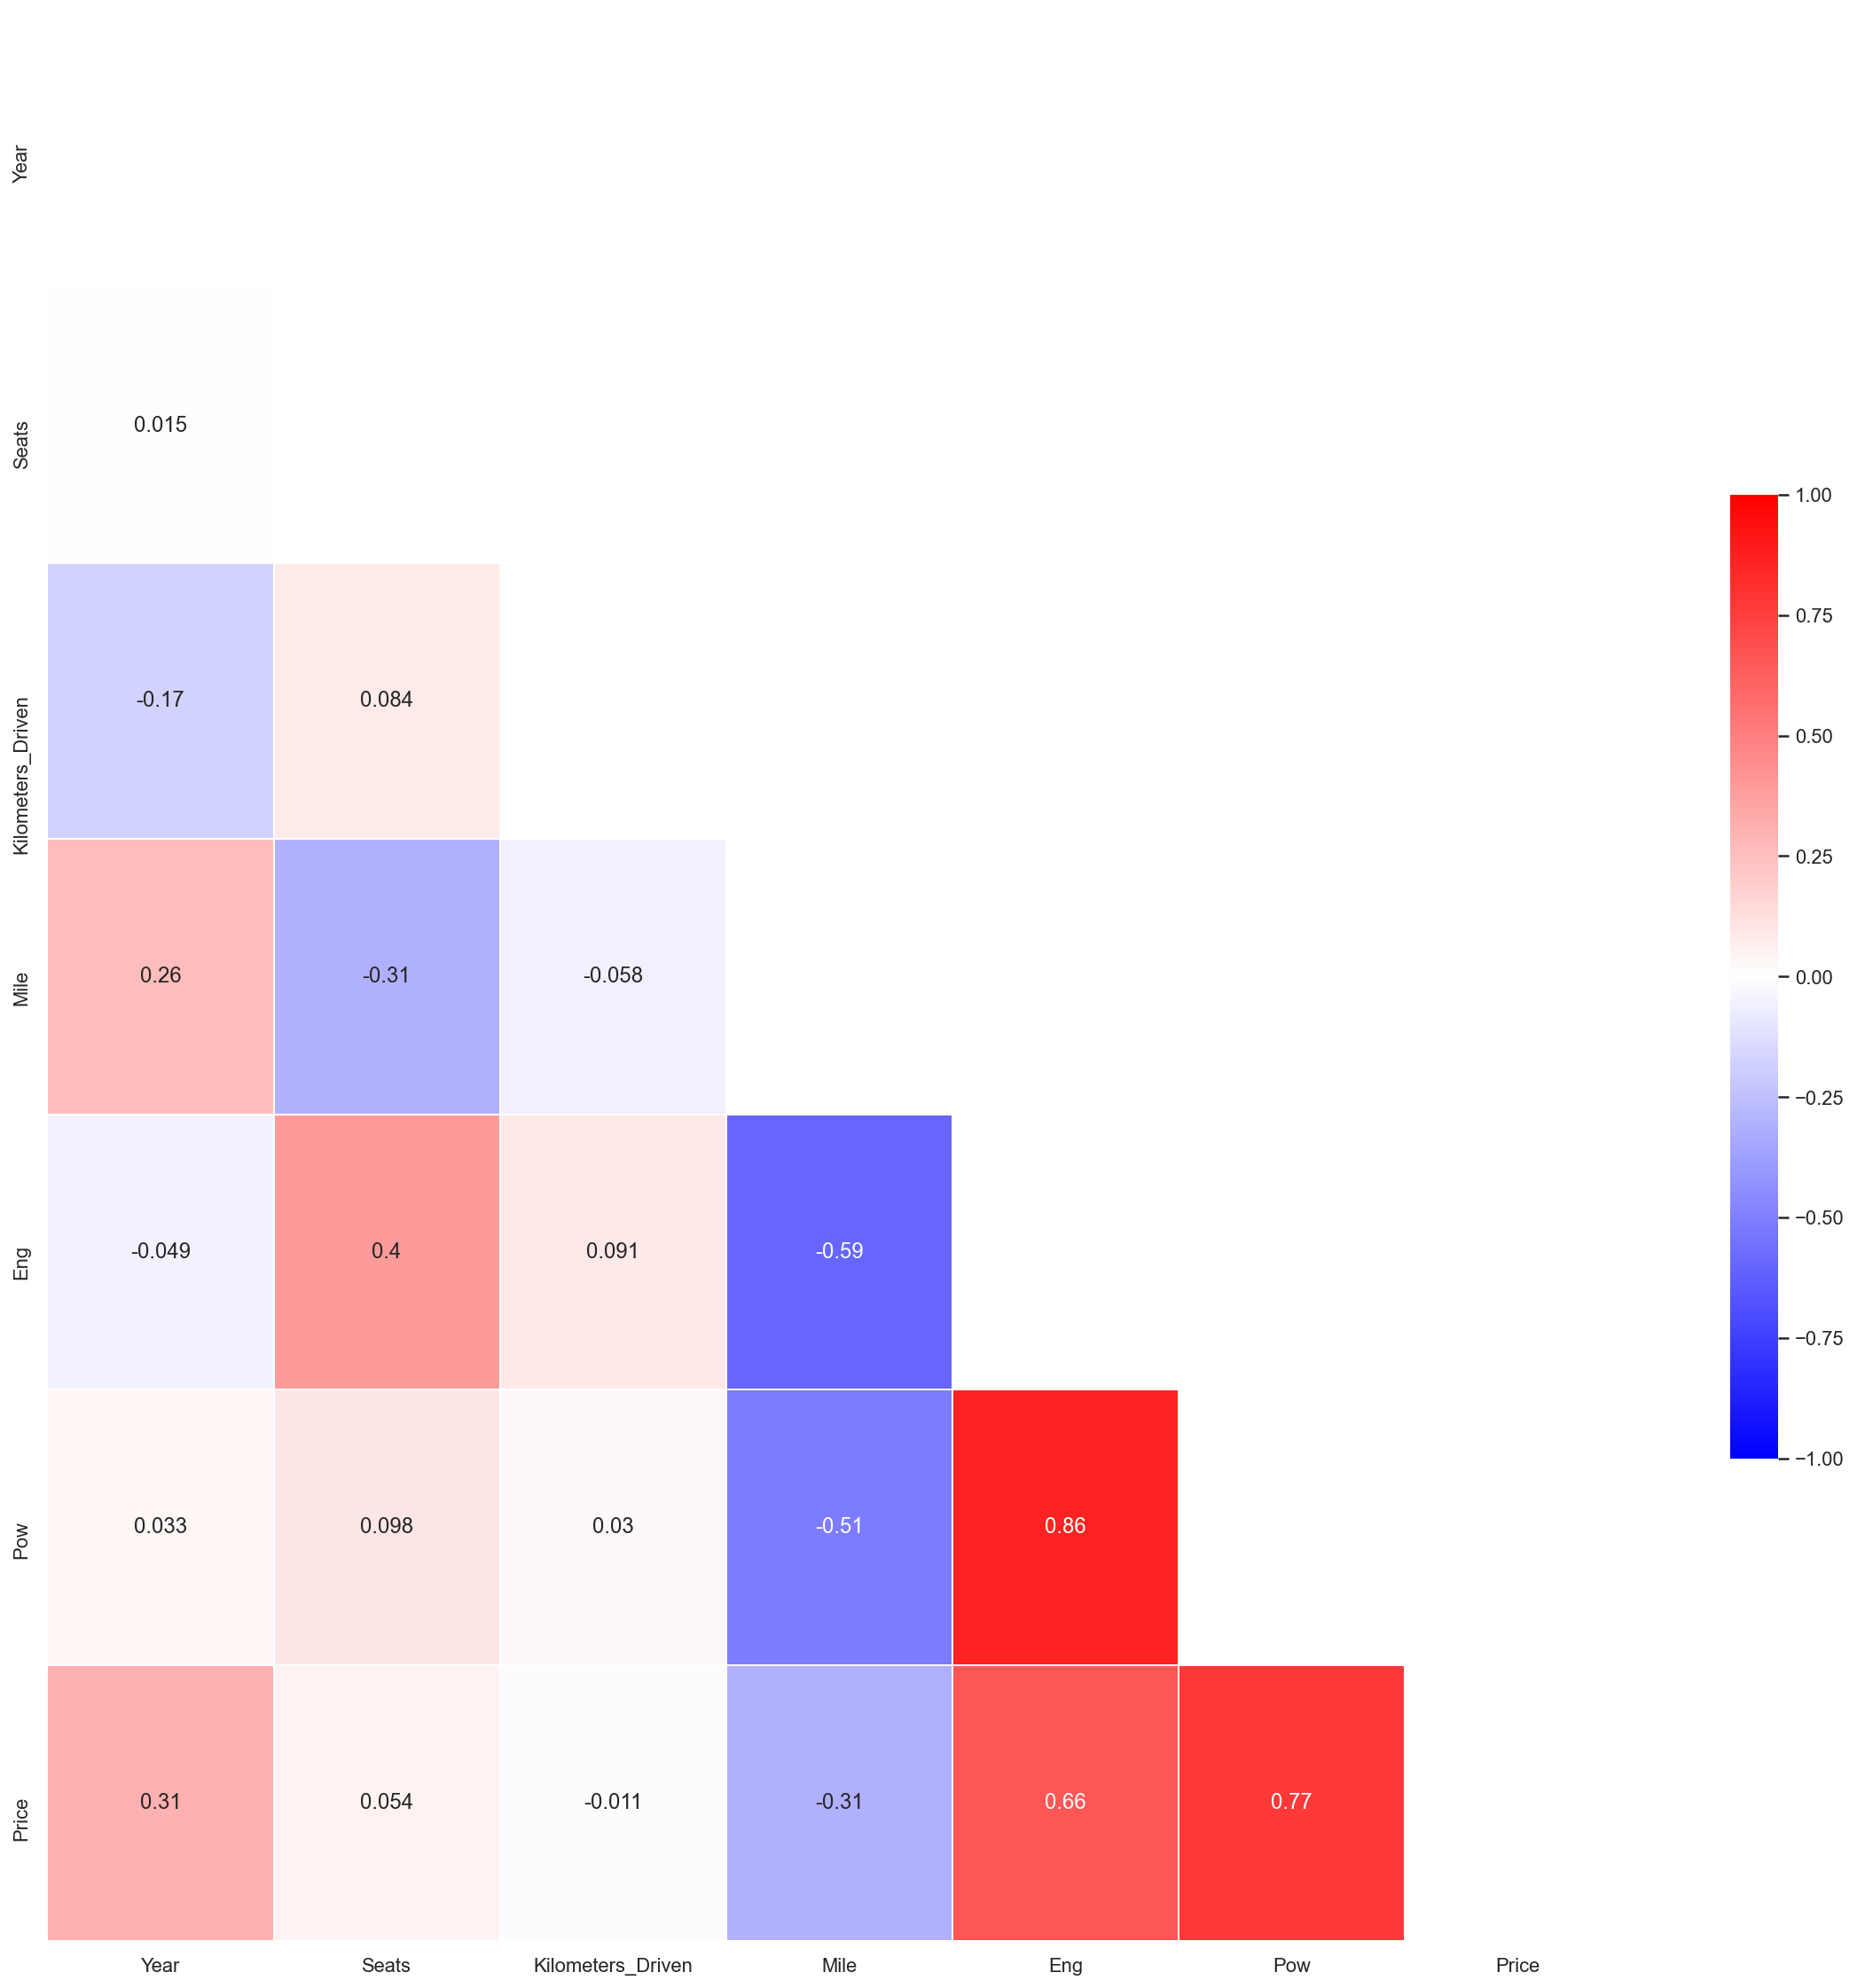

In [21]:
# 주요 변수들로 히트맵
df = car_t[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

fig, ax = plt.subplots( figsize=(20,20) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

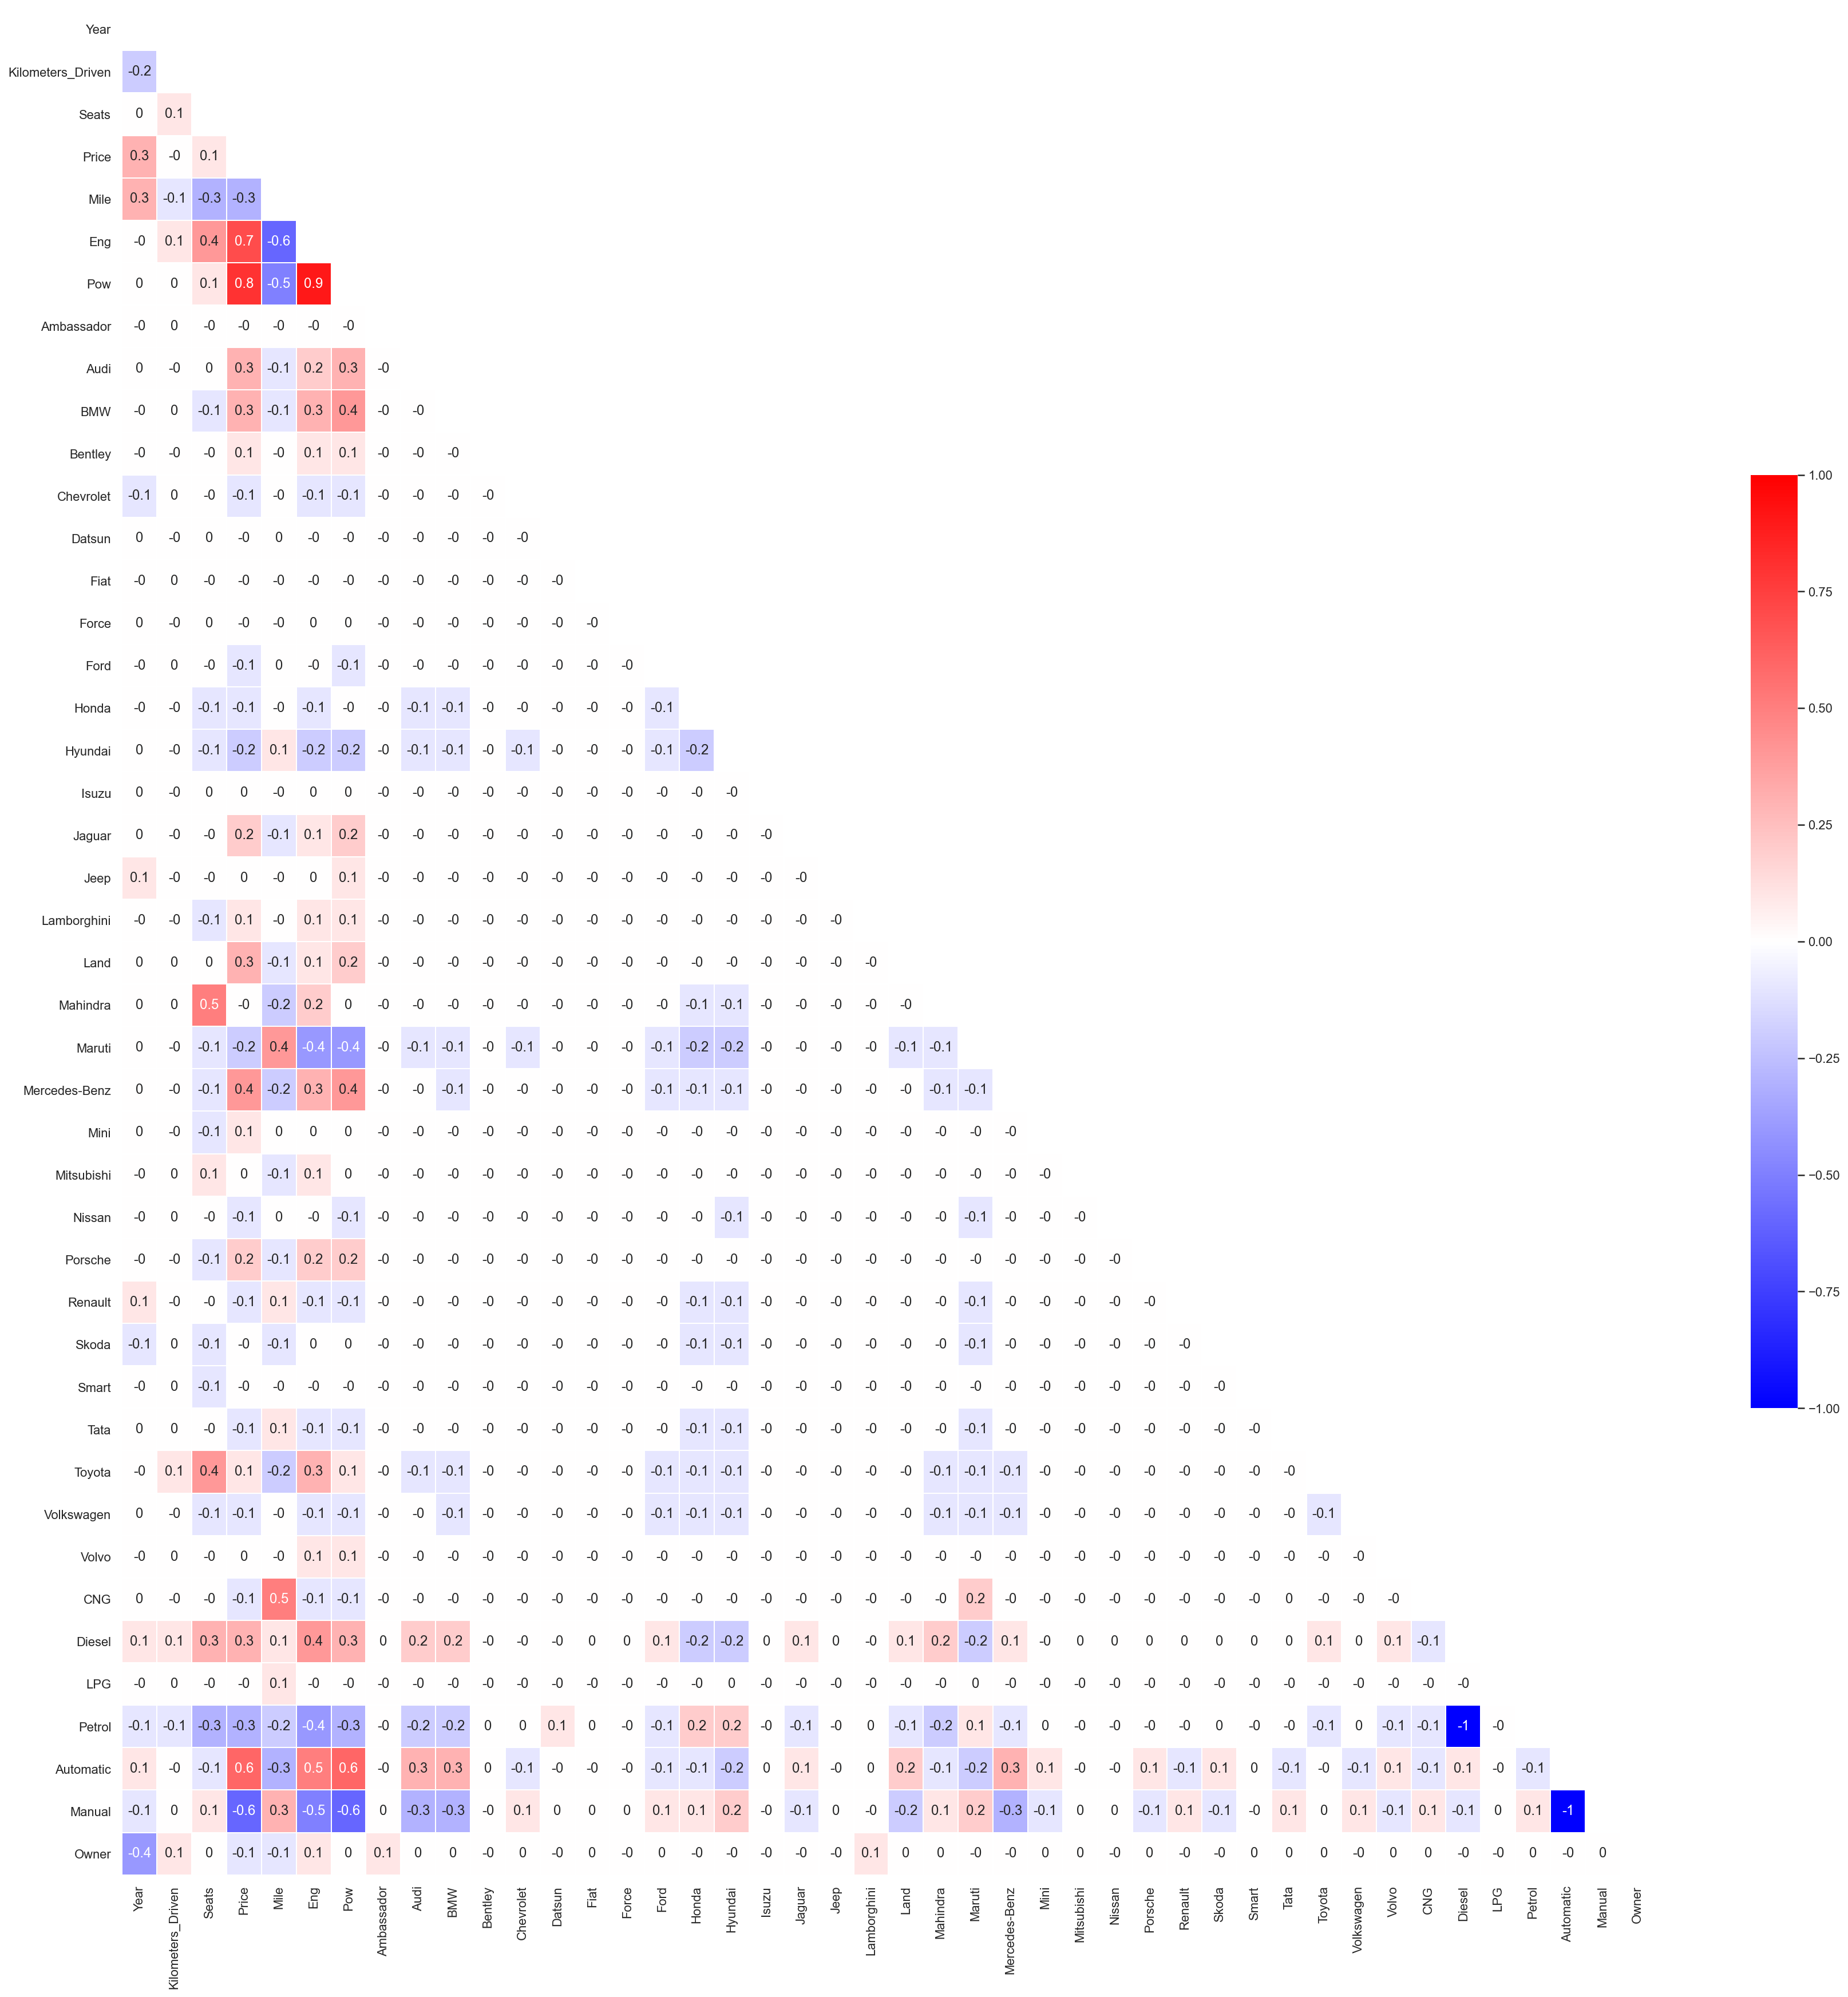

In [22]:
# 모든 컬럼을 변수로 히트맵
df = car_t.corr().round(1)

fig, ax = plt.subplots( figsize=(30,30) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

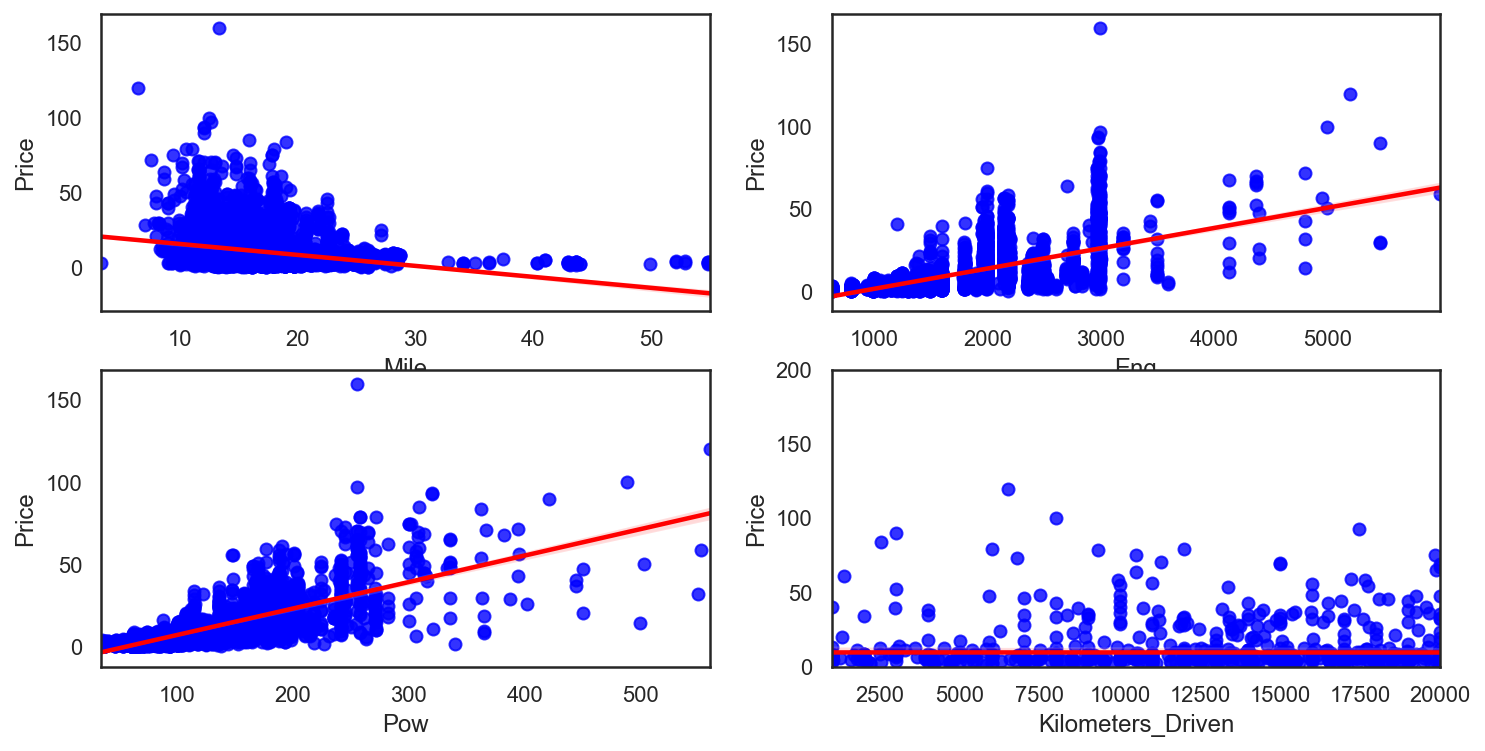

In [23]:
# 주요변수로 regplot
plt.figure(figsize=(12,6))

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="Kilometers_Driven", y="Price",
                data=car_t, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.axis([1000, 20000, 0, 200])
plt.show()

In [24]:
# new_price가 있는 데이터 전처리

car_td = car_t.dropna()

car_td.reset_index(drop=True, inplace=True)

get_split(car_td, 'New_Price', 'new_price')

car_td['new_price'] = car_td['new_price'].astype(float)

new_price


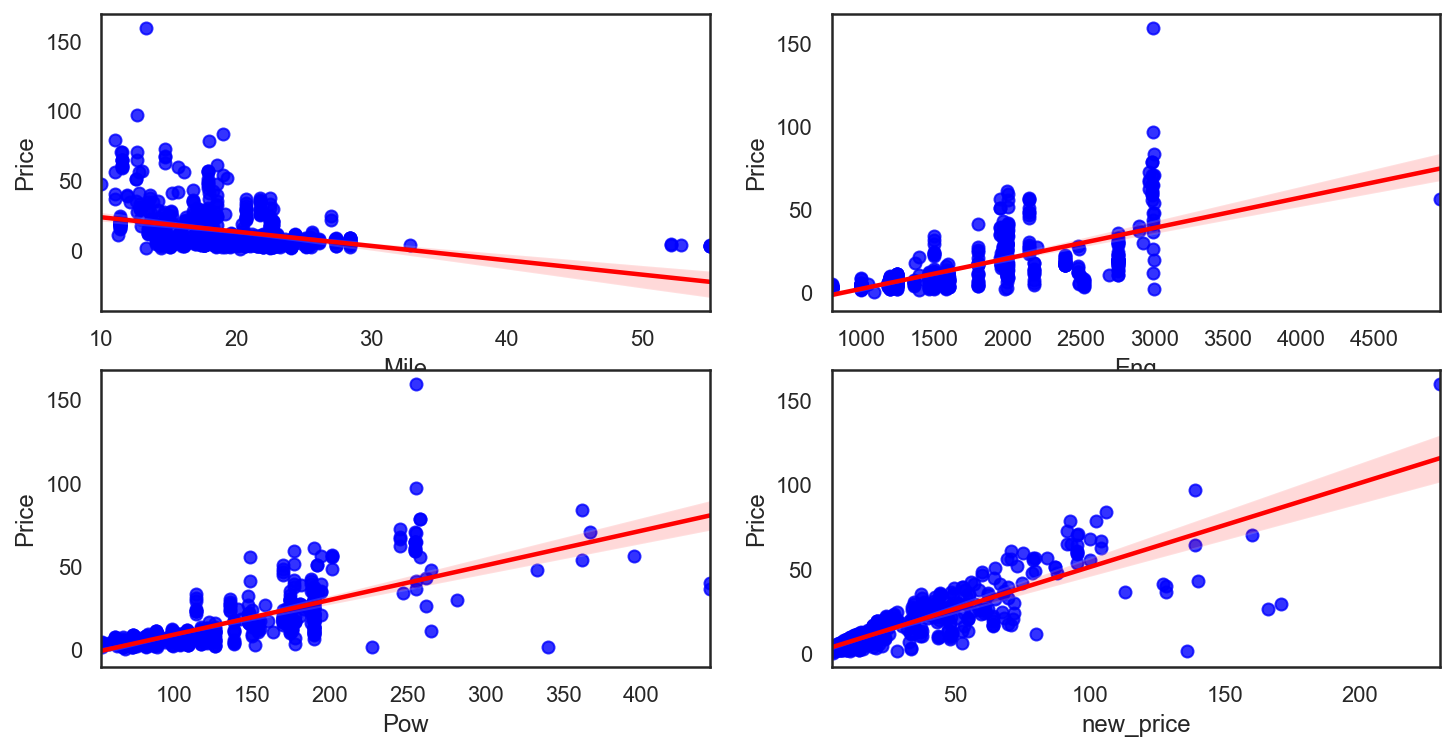

In [25]:
# new_price가 있는 데이터 regplot

plt.figure(figsize=(12,6))
plt.axis([50, 500, 0, 200])

plt.subplot(221)
sns.regplot(x="Mile", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(222)
sns.regplot(x="Eng", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(223)
sns.regplot(x="Pow", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

plt.subplot(224)
sns.regplot(x="new_price", y="Price",
                data=car_td, scatter_kws={'color':'blue'}, 
            line_kws={'color':'red'})

## 모델 및 데이터 탐색

In [26]:
# linear 모델 결과 확인
def get_results(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
    print('r2_score: {}'.format(r2_score(pred_test, y_test)))

## 1. new_price가 있는 데이터 823개

In [27]:
# new_price가 있는 데이터 823개, 컬럼 51개

x = car_td.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_td['Price']

get_results(x, y)

explained_variance_score: 0.7273686034338473
mean_squared_errors: 46.35748393233807
r2_score: 0.7256936237219112


## 2. new_price 컬럼 제거, 6017개

In [28]:
# new_price를 drop한 6017개, 컬럼 50개

x = car_t.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_t['Price']

get_results(x, y)

explained_variance_score: 0.6851230586401141
mean_squared_errors: 29.775041814681938
r2_score: 0.6840608572493682


## 3. raw 데이터, new_price가 있는 데이터 823개

In [29]:
# raw 데이터, new_price notnull값 823개, 컬럼 14개
# 전처리
car_tr.dropna(inplace=True)
car_tr.reset_index(drop=True, inplace=True)

get_split(car_tr, 'Mileage', 'Mile')
get_split(car_tr, 'Engine', 'Eng')
get_split(car_tr, 'Power', 'Pow')
get_split(car_tr, 'New_Price', 'new_price')

Mile
Eng
Pow
new_price


In [30]:
# raw 데이터, new_price notnull값 823개, 컬럼 14개

x = car_tr.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','New_Price',
                 'Owner_Type','Mileage','Engine','Power','Price'], axis=1)
y = car_tr['Price']

get_results(x, y)

explained_variance_score: 0.6518194945588607
mean_squared_errors: 62.23183504708037
r2_score: 0.6436665111804925


## 4. 지역 dummy

In [31]:
dummy = pd.get_dummies(car_t['Location'])
car_t_l = pd.concat([car_t, dummy], axis=1)

In [32]:
x = car_t_l.drop(['Name','Location','New_Price','Brand','Car_name', 'Price'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.7042040951111259
mean_squared_errors: 28.575435941607154
r2_score: 0.702808708297503


## 5. 컬럼끼리 상관관계가 높은 컬럼 제거

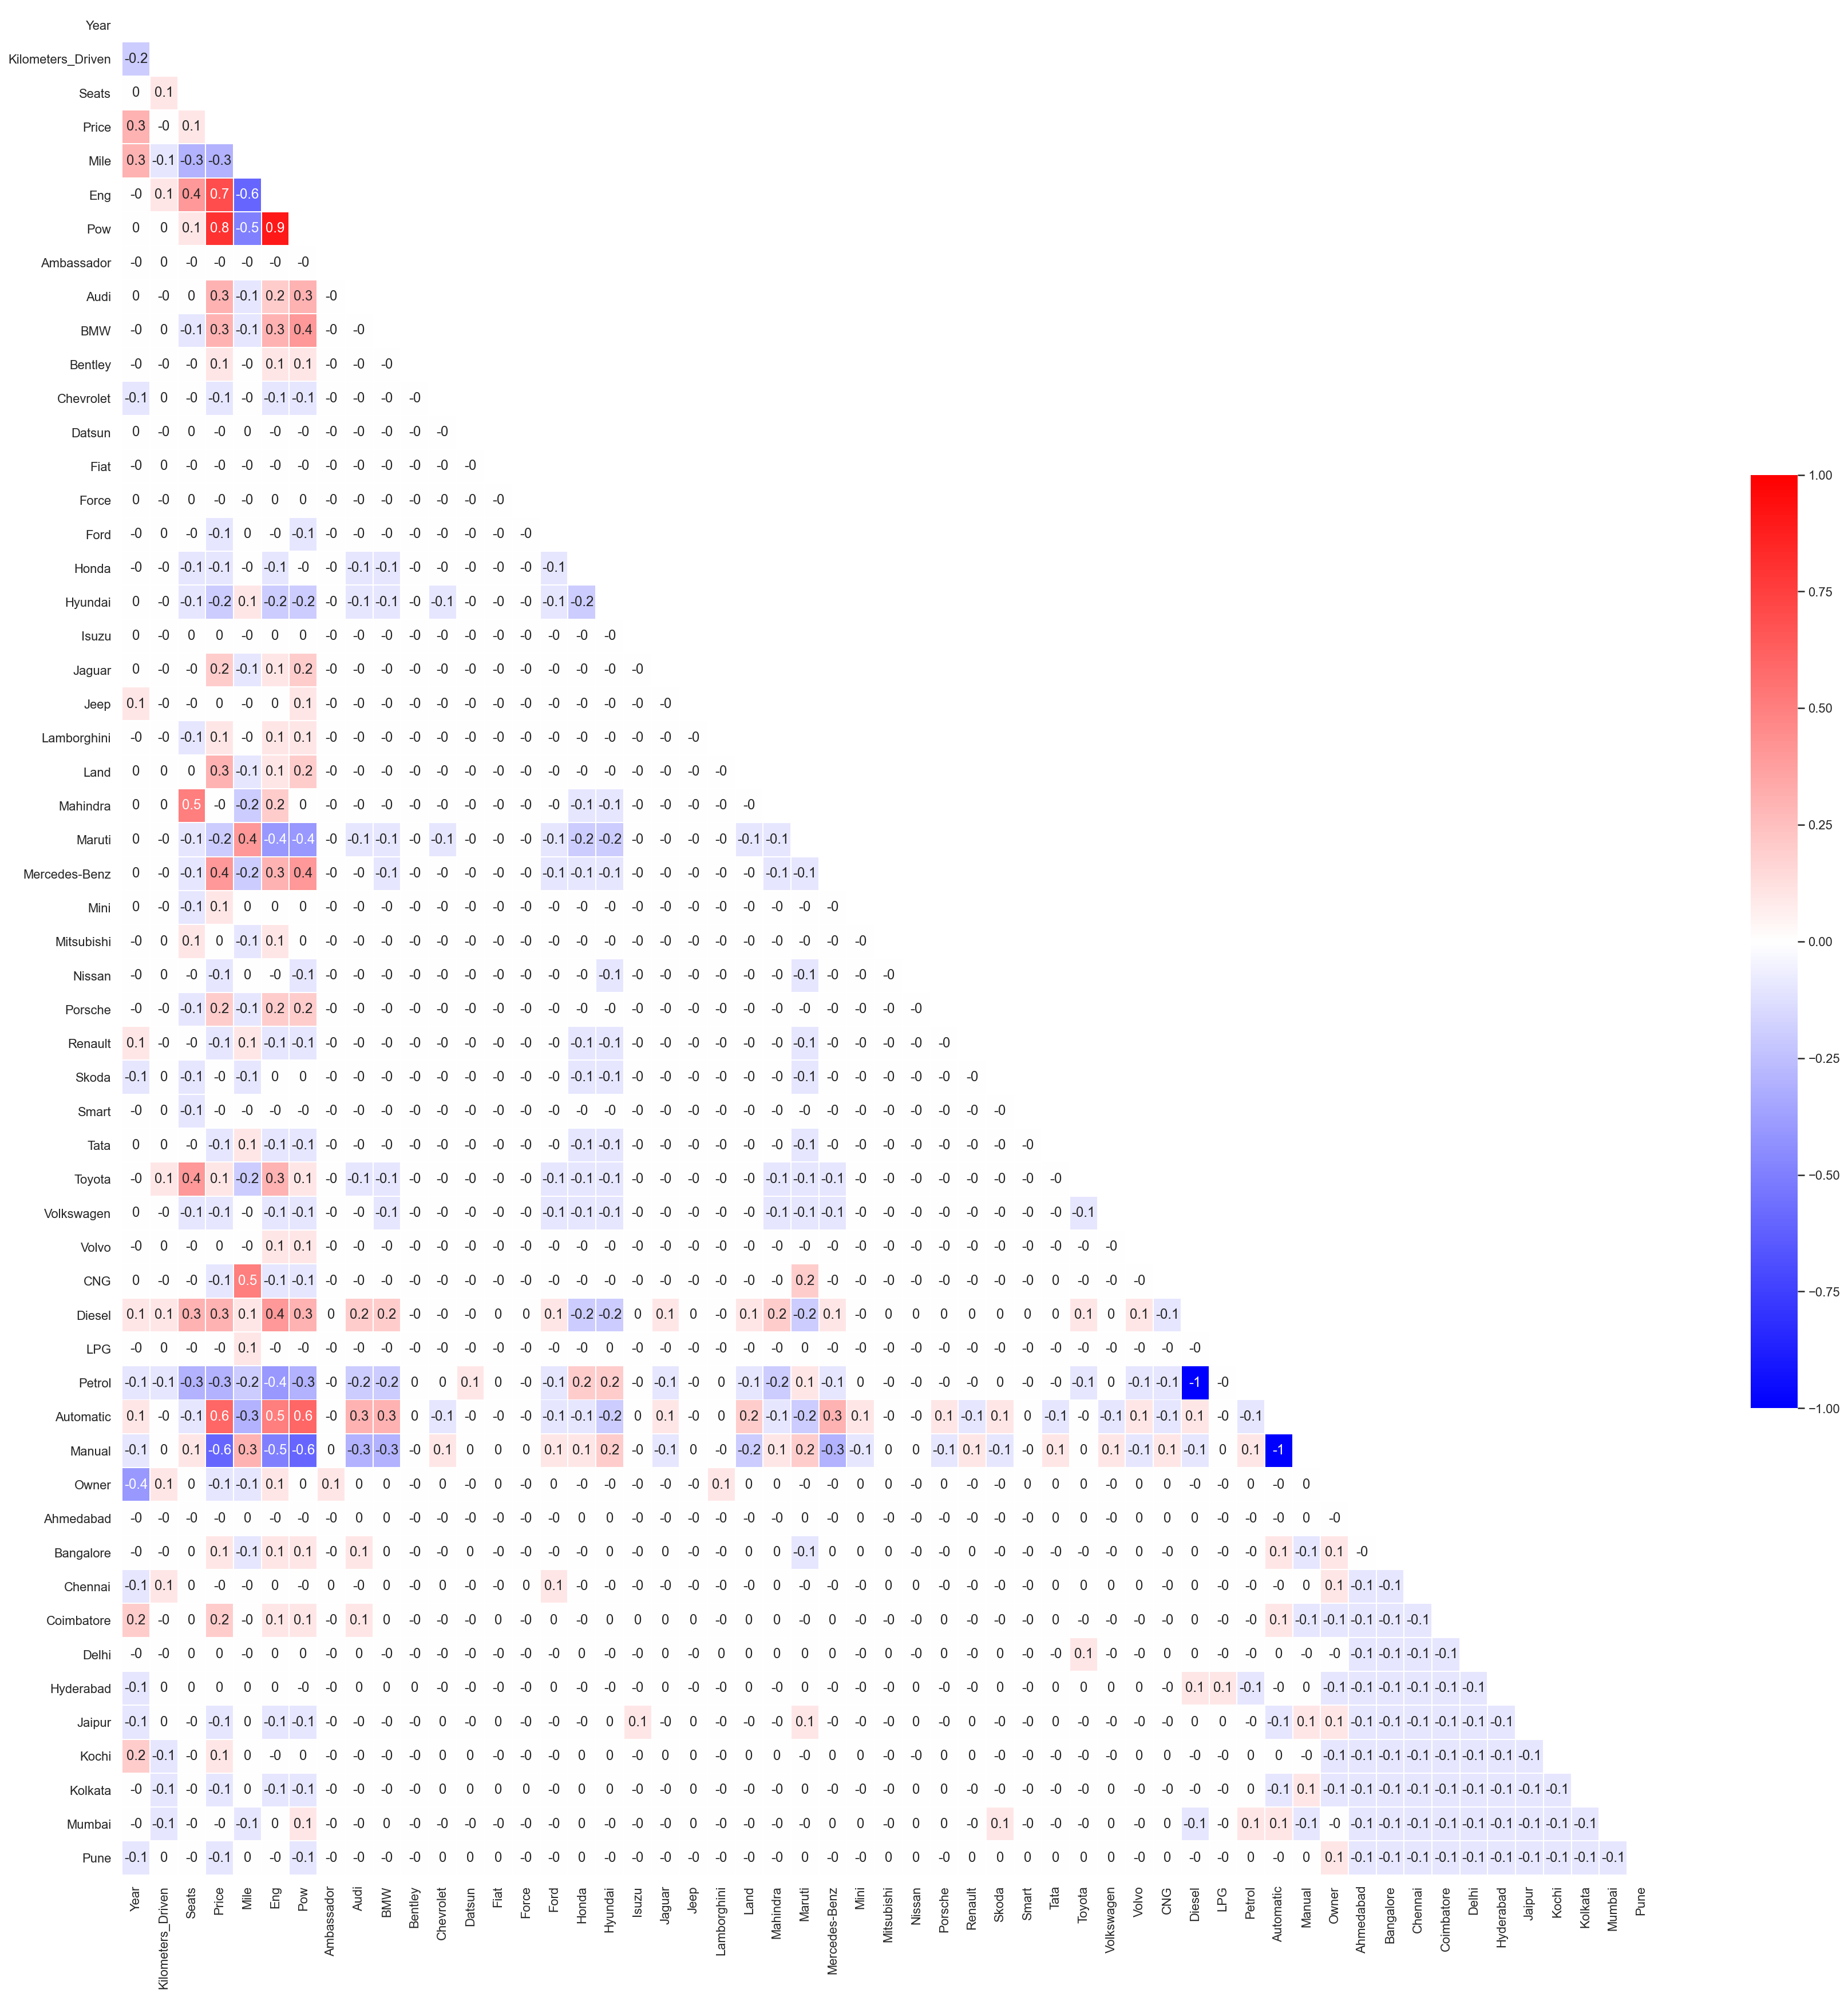

In [33]:
df = car_t_l.corr().round(1)

fig, ax = plt.subplots( figsize=(30,30) )

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

In [34]:
# 엔진 빼는것이 더 성능을 높임
x = car_t_l.drop(['Name','Location','New_Price','Brand','Car_name','Price','Eng'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.7069171710901084
mean_squared_errors: 28.345742980595126
r2_score: 0.7056570405919271


In [35]:
x = car_t_l.drop(['Name','Location','New_Price','Brand','Car_name','Price','Pow'], axis=1)
y = car_t_l['Price']

get_results(x, y)

explained_variance_score: 0.665638981956897
mean_squared_errors: 31.720053720031657
r2_score: 0.6640995942256742


## 6. 이상치 제거

In [43]:
car_t_l.head(1)

,Name,Location,Year,Kilometers_Driven,Seats,New_Price,Price,Brand,Car_name,Mile,Eng,Pow,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual,Owner,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,5,NaN,1.75,Maruti,Wagon R LXI CNG,43.624,998.0,58.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0


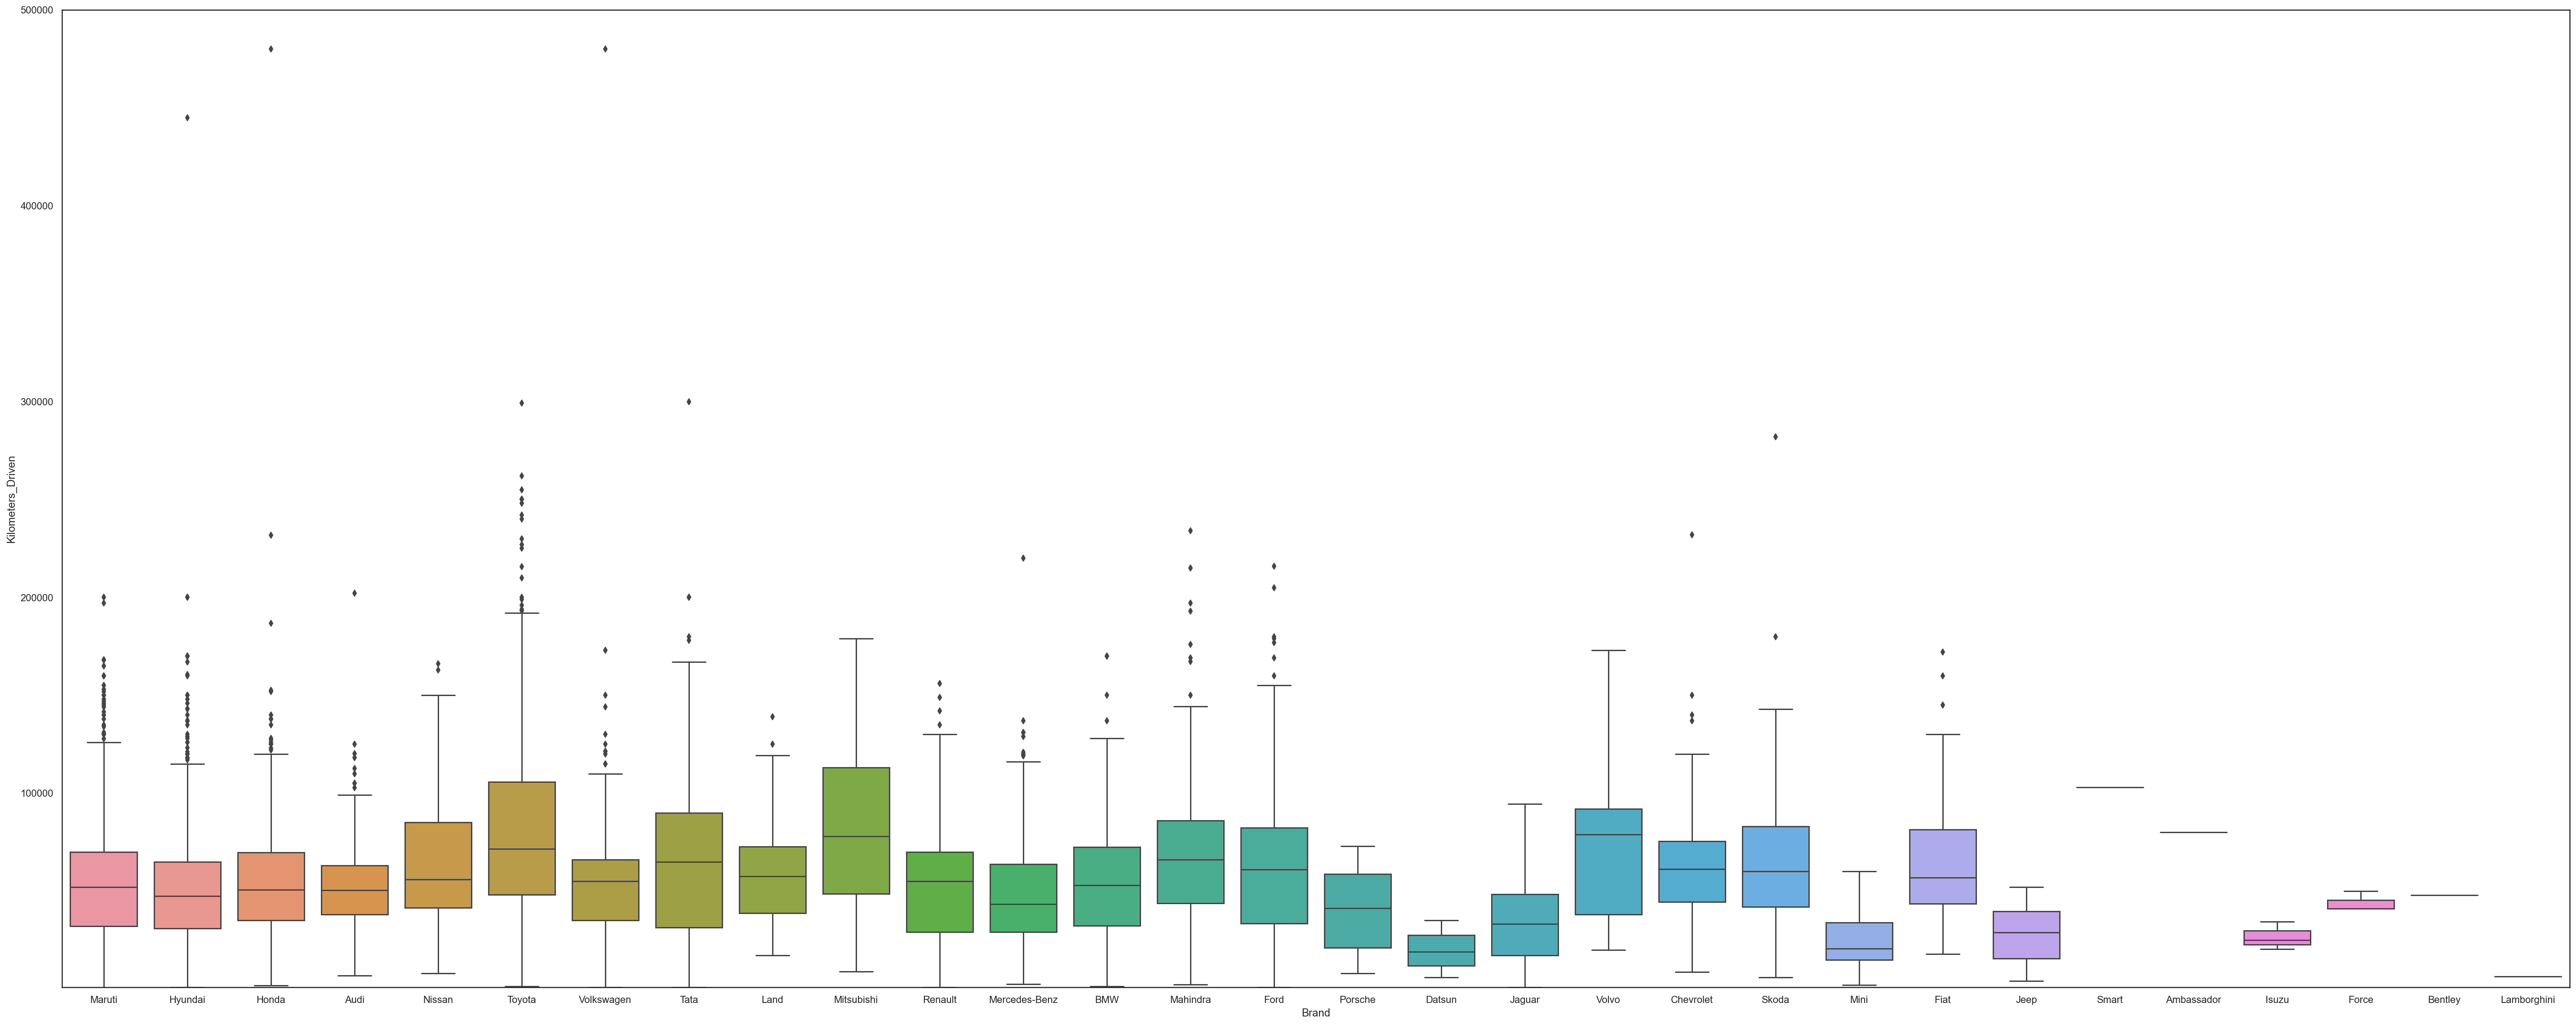

In [58]:
plt.figure(figsize=(50,20))
plt.axis([0, 5, 1000, 500000])
sns.boxplot(x='Brand', y='Kilometers_Driven', data=car_t_l)
plt.show()

In [60]:
car_t.sort_values(by='Kilometers_Driven', ascending=False)

,Name,Location,Year,Kilometers_Driven,Seats,New_Price,Price,Brand,Car_name,Mile,Eng,Pow,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Lamborghini,Land,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,CNG,Diesel,LPG,Petrol,Automatic,Manual,Owner
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,5,NaN,65.00,BMW,X5 xDrive 30d M Sport,15.97,2993.0,258.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,5,NaN,7.50,Skoda,Octavia Ambition Plus 2.0 TDI AT,19.30,1968.0,141.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,5,NaN,5.90,Volkswagen,Vento Diesel Highline,20.54,1598.0,103.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,5,NaN,2.70,Hyundai,i10 Magna 1.2,20.36,1197.0,78.90,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
3092,Honda City i VTEC SV,Kolkata,2015,480000,5,NaN,5.00,Honda,City i VTEC SV,17.40,1497.0,117.30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,5,7.39 Lakh,6.50,Hyundai,Grand i10 1.2 Kappa Asta,18.90,1197.0,81.86,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,5,NaN,7.50,Tata,Xenon XT EX 4X2,13.49,2179.0,138.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1
1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,5,6.74 Lakh,5.68,Volkswagen,Polo 1.0 MPI Trendline,18.78,999.0,75.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
5604,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,5,6.8 Lakh,6.25,Maruti,Wagon R ZXI AMT 1.2,21.50,1197.0,81.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1


## 7. StandardScaler

## 8. MinMaxScaler

## 앞으로
1. PCA와 그래프, 지역 dummy
1. 브랜드별 그래프, 가격 그래프, 데이터를 시각적으로 보여줄 수 있도록
2. scaling
3. 의미 없는 feature로 모델이 잘못 학습될 수 있으니 의미 없는 feature 제거
2. 모델 적용, 최적의 파라미터 탐색
3. MSE 수치 확인

In [36]:
# def get_results2(x, y):

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#     reg = LinearRegression()
#     reg.fit(x_train, y_train)

#     pred_test = reg.predict(x_test)

    
#     return(mean_squared_error(pred_test, y_test))
   

In [37]:
# ls_1000 = []

In [38]:
# for _ in range(0,10000):
#     car_8s = car_t[car_t['New_Price'].isnull()].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Price','Name','Location','New_Price','Brand','Car_name'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

In [39]:
# ls_1000_pd = pd.DataFrame(ls_1000)

In [40]:
# len(ls_1000_pd)

### 10% 확률로 new_price를 넣었을 때 모델 성능이 좋음

In [41]:
# len(ls_1000_pd[ls_1000_pd[0]>=46])/100 